Updated example of using networkx and international trade data

In [1]:
%config Completer.use_jedi = False

In [2]:
import networkx as nx
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [3]:
G = nx.DiGraph()
 
with open('440710.csv', 'r') as csvfile:

    csv_f = csv.reader(csvfile)
    next(csv_f)
    
    for row in csv_f:
        G.add_edge(row[0],row[2], weight=float(row[1])) 

In [4]:
totexp = {}
for exp in G.nodes():
    tx=sum([G[u][v]['weight'] for u, v in G.out_edges(exp)])
    totexp[exp] = tx
nx.set_node_attributes(G, totexp, 'totexp')

In [5]:
# Calculate eigenvector centrality of matrix G 
# with the exports value as weights
ec = nx.eigenvector_centrality_numpy(G, weight='weight')

# Set this as a node attribute for each node
nx.set_node_attributes(G, ec, name='cent')

# Use this measure to determine the node color in viz
node_color = [float(G.nodes[v]['cent']) for v in G.nodes]

# Use the results later for the node's size in the graph
totexp = [float(G.nodes[v]['totexp']) for v in G.nodes]
avgexp = sum(totexp) / len(totexp)
node_size = [20 * float(G.nodes[v]['totexp']) / avgexp for v in G.nodes]

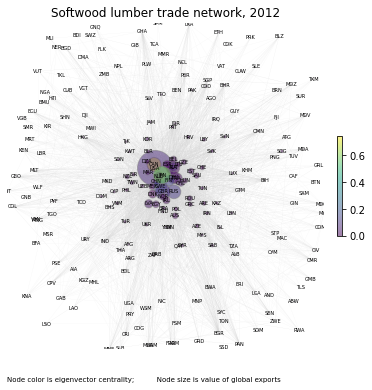

In [6]:
# Visualization
# Calculate position of each node in G using networkx spring layout
pos = nx.spring_layout(G,k=30,iterations=8) 

# Draw nodes
nodes = nx.draw_networkx_nodes(G,pos, node_size=node_size, \
                               node_color=node_color, alpha=0.5) 
# Draw edges
edges = nx.draw_networkx_edges(G, pos, edge_color='lightgray', \
                               arrows=False, width=0.05,)

# Add labels
nx.draw_networkx_labels(G,pos,font_size=5)
nodes.set_edgecolor('gray')

# Add labels and title
ax = plt.gca()
plt.text(0,-0.1, \
         'Node color is eigenvector centrality; \
         Node size is value of global exports', \
         fontsize=7,  transform = ax.transAxes)
plt.title('Softwood lumber trade network, 2012', fontsize=12)

# Bar with color scale for eigenvalues
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)

# Plot options
plt.margins(0,0)
plt.axis('off')

fig = plt.gcf()

fig.set_figheight(6)
fig.set_figwidth(6)

# Save as high quality png
#plt.savefig('760200.png', dpi=1000)